### **Phase 1 Abstract**  

In this notebook, we aim to generate a word cloud from the top search results of a Google query to provide a visual summary of the most frequently discussed topics related to the search. By extracting text content from the top-ranked URLs, we preprocess the data to clean it and remove irrelevant stop words. Additionally, we enhance the representation by incorporating bigrams and trigrams, which capture commonly occurring multi-word phrases. The text data is then analyzed for word frequency, and a word cloud is generated using Python libraries such as BeautifulSoup, NLTK, and WordCloud. This project demonstrates an automated method for summarizing web search results, making it easier to identify key themes and concepts without manually reading each web page.

In [15]:
!pip install beautifulsoup4 wordcloud googlesearch-python matplotlib nltk

In [16]:
import re

def fix_name_structure(name):
    """
    Convert names from "LAST, FIRST MIDDLE" format to "First Middle Last".
    Handles suffixes like Jr., II, III and compound names correctly.
    """
    # Split by commas, while handling cases with multiple commas (e.g., JR.)
    parts = name.split(", ")

    if len(parts) == 2:
        last_name, first_middle = parts
    elif len(parts) == 3:  # Handles cases like "BONG REVILLA, RAMON, JR."
        last_name, first_middle, suffix = parts
        first_middle += f" {suffix}"  # Append suffix to first/middle names
    else:
        return name  # If no comma, return as-is

    # Format name as "First Middle Last"
    formatted_name = f"{first_middle} {last_name}"

    return formatted_name.strip()


In [17]:
# Reference:
# https://www.rappler.com/philippines/elections/senatorial-candidates-pulse-asia-survey-january-2025/

# List of names with party affiliations
data = [
    "TULFO, ERWIN (LAKAS)", "GO, BONG GO (PDPLBN)", "SOTTO, TITO (NPC)",
    "TULFO, BEN BITAG (IND)", "CAYETANO, PIA (NP)", "BONG REVILLA, RAMON, JR. (LAKAS)",
    "MARCOS, IMEE R. (NP)", "LACSON, PING (IND)", "REVILLAME, WILLIE WIL (IND)",
    "DELA ROSA, BATO (PDPLBN)", "BINAY, ABBY (NPC)", "PACQUIAO, MANNY PACMAN (PFP)",
    "VILLAR, CAMILLE (NP)", "LAPID, LITO (NPC)"
]

# Clean and organize data
names = [entry.split(' (')[0] for entry in data]  # Remove party affiliations
names = [fix_name_structure(name) for name in names]
parties = [entry.split(' (')[1][:-1] for entry in data]  # Extract party affiliations
names

['ERWIN TULFO',
 'BONG GO GO',
 'TITO SOTTO',
 'BEN BITAG TULFO',
 'PIA CAYETANO',
 'RAMON JR. BONG REVILLA',
 'IMEE R. MARCOS',
 'PING LACSON',
 'WILLIE WIL REVILLAME',
 'BATO DELA ROSA',
 'ABBY BINAY',
 'MANNY PACMAN PACQUIAO',
 'CAMILLE VILLAR',
 'LITO LAPID']

In [31]:
import urllib.request as url
from bs4 import BeautifulSoup
from wordcloud import WordCloud
from googlesearch import search
import matplotlib.pyplot as plt
from nltk import word_tokenize
from nltk.util import ngrams
from collections import Counter
from nltk.corpus import stopwords
import re
import nltk
import time

# Download NLTK data (for the first run)
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [32]:

def get_tokens(query, num_results=10, delay=2.0):
    """
    Fetches tokens from Google search results with a delay between requests.

    Args:
        query (str): Search query.
        num_results (int): Number of search results to process.
        delay (float): Time (in seconds) to wait between search requests.

    Returns:
        tuple: (tokens, bigrams, trigrams)
    """

    # Fetch top search result URLs
    urls = list(search(query, num_results=num_results, lang="en"))

    text_data = ""

    for link in urls:
        try:
            # Delay between each request
            time.sleep(delay)

            response = url.urlopen(link)
            html_content = response.read()
            soup = BeautifulSoup(html_content, "lxml")
            text_data += soup.get_text(separator=" ")

        except Exception as e:
            print(f"Error fetching {link}: {e}")

    # Clean the text by removing non-alphabetic characters
    text_data = re.sub(r'[^a-zA-Z\s]', '', text_data).lower()

    # Tokenize text
    tokens = word_tokenize(text_data)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Generate bigrams and trigrams
    bigrams = [' '.join(gram) for gram in ngrams(tokens, 2)]
    trigrams = [' '.join(gram) for gram in ngrams(tokens, 3)]

    return tokens, bigrams, trigrams


In [33]:
def display_word_cloud(tokens):

  # Count frequencies of words, bigrams, and trigrams
  word_freq = Counter(tokens)

  # Generate the word cloud with high resolution
  wordcloud = WordCloud(
      width=2000,
      height=1000,
      max_font_size=300,
      max_words=100,
      background_color="white"
  ).generate_from_frequencies(word_freq)

  # Display the word cloud with high resolution
  plt.figure(figsize=(15, 10), dpi=200)  # Increase figsize and dpi for higher resolution
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()


Error fetching https://www.congress.gov.ph/house-members/view/?member=K140&name=Tulfo%2C+Erwin+T.: HTTP Error 403: Forbidden
Error fetching https://www.instagram.com/erwintulforeal/: HTTP Error 429: Too Many Requests
Name:  ERWIN TULFO


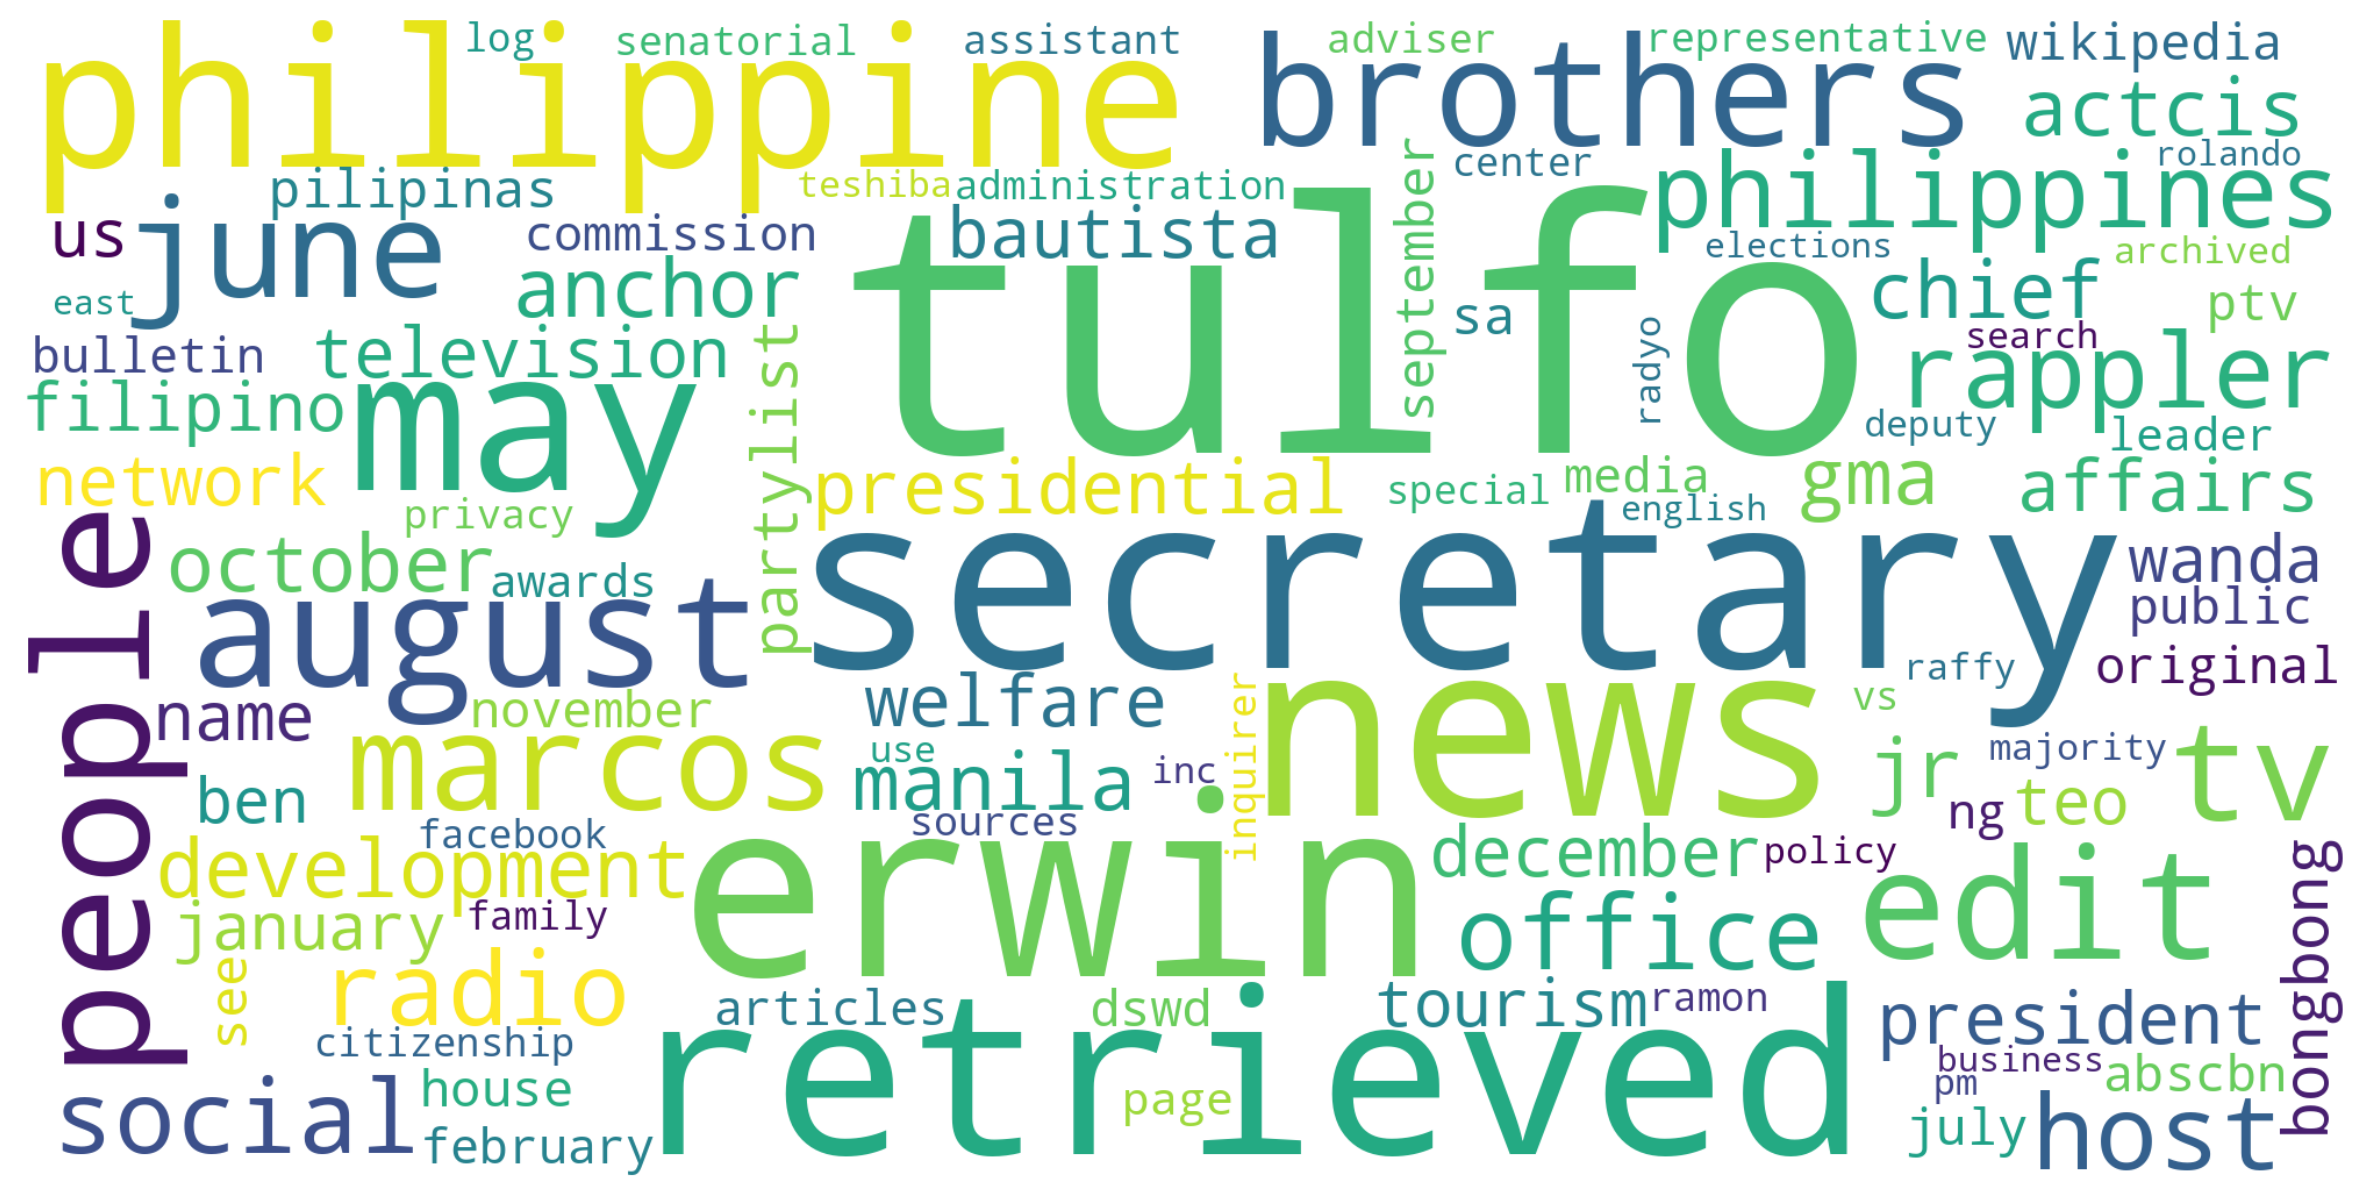

Name:  ERWIN TULFO


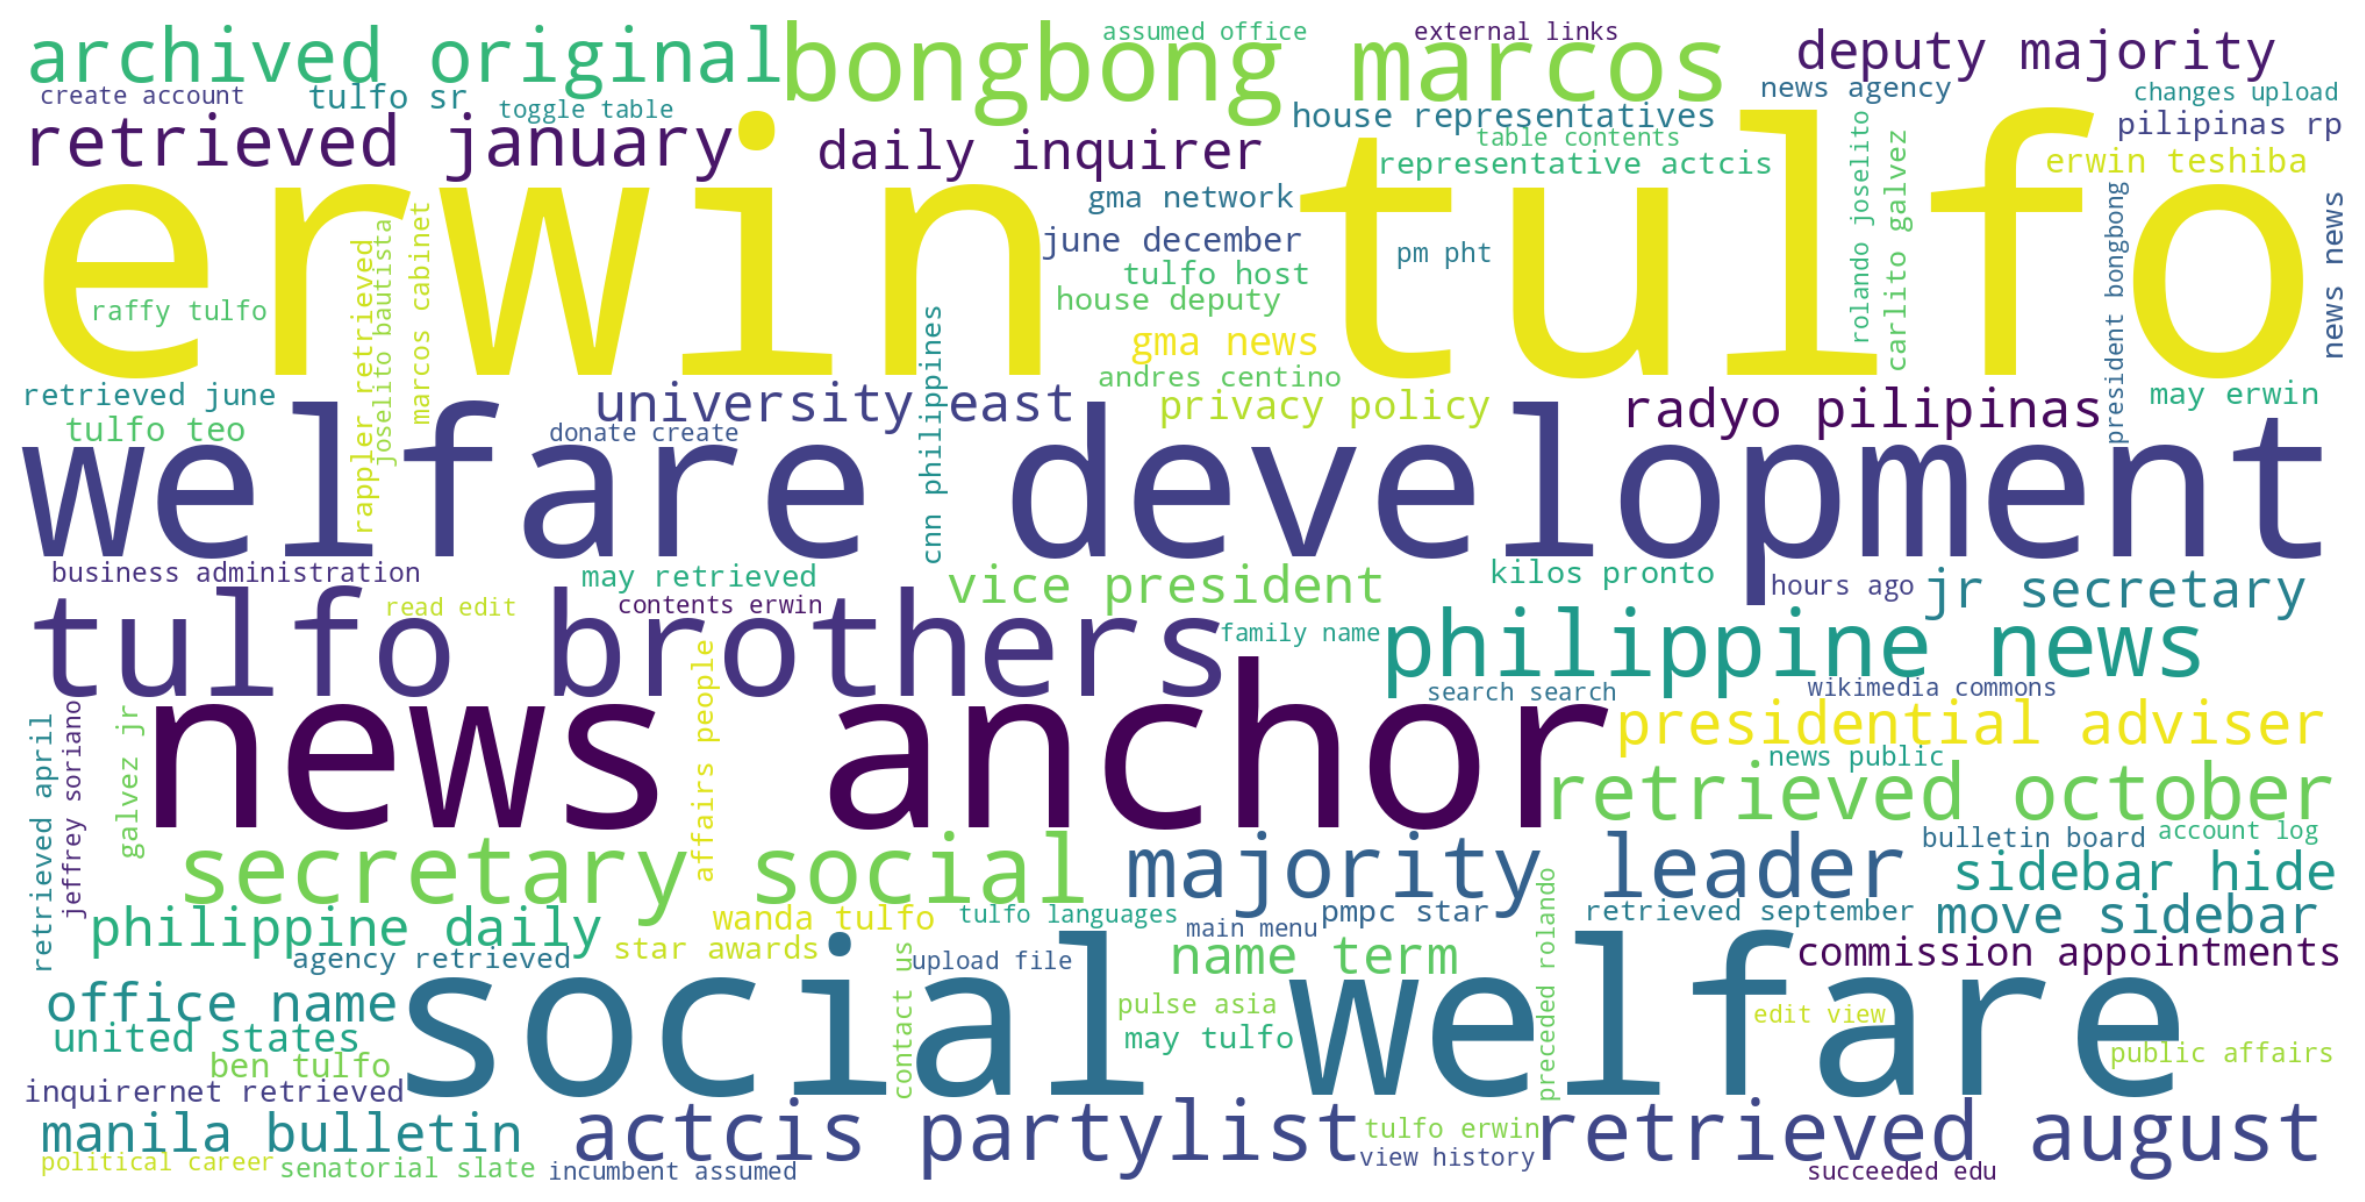

Name:  ERWIN TULFO


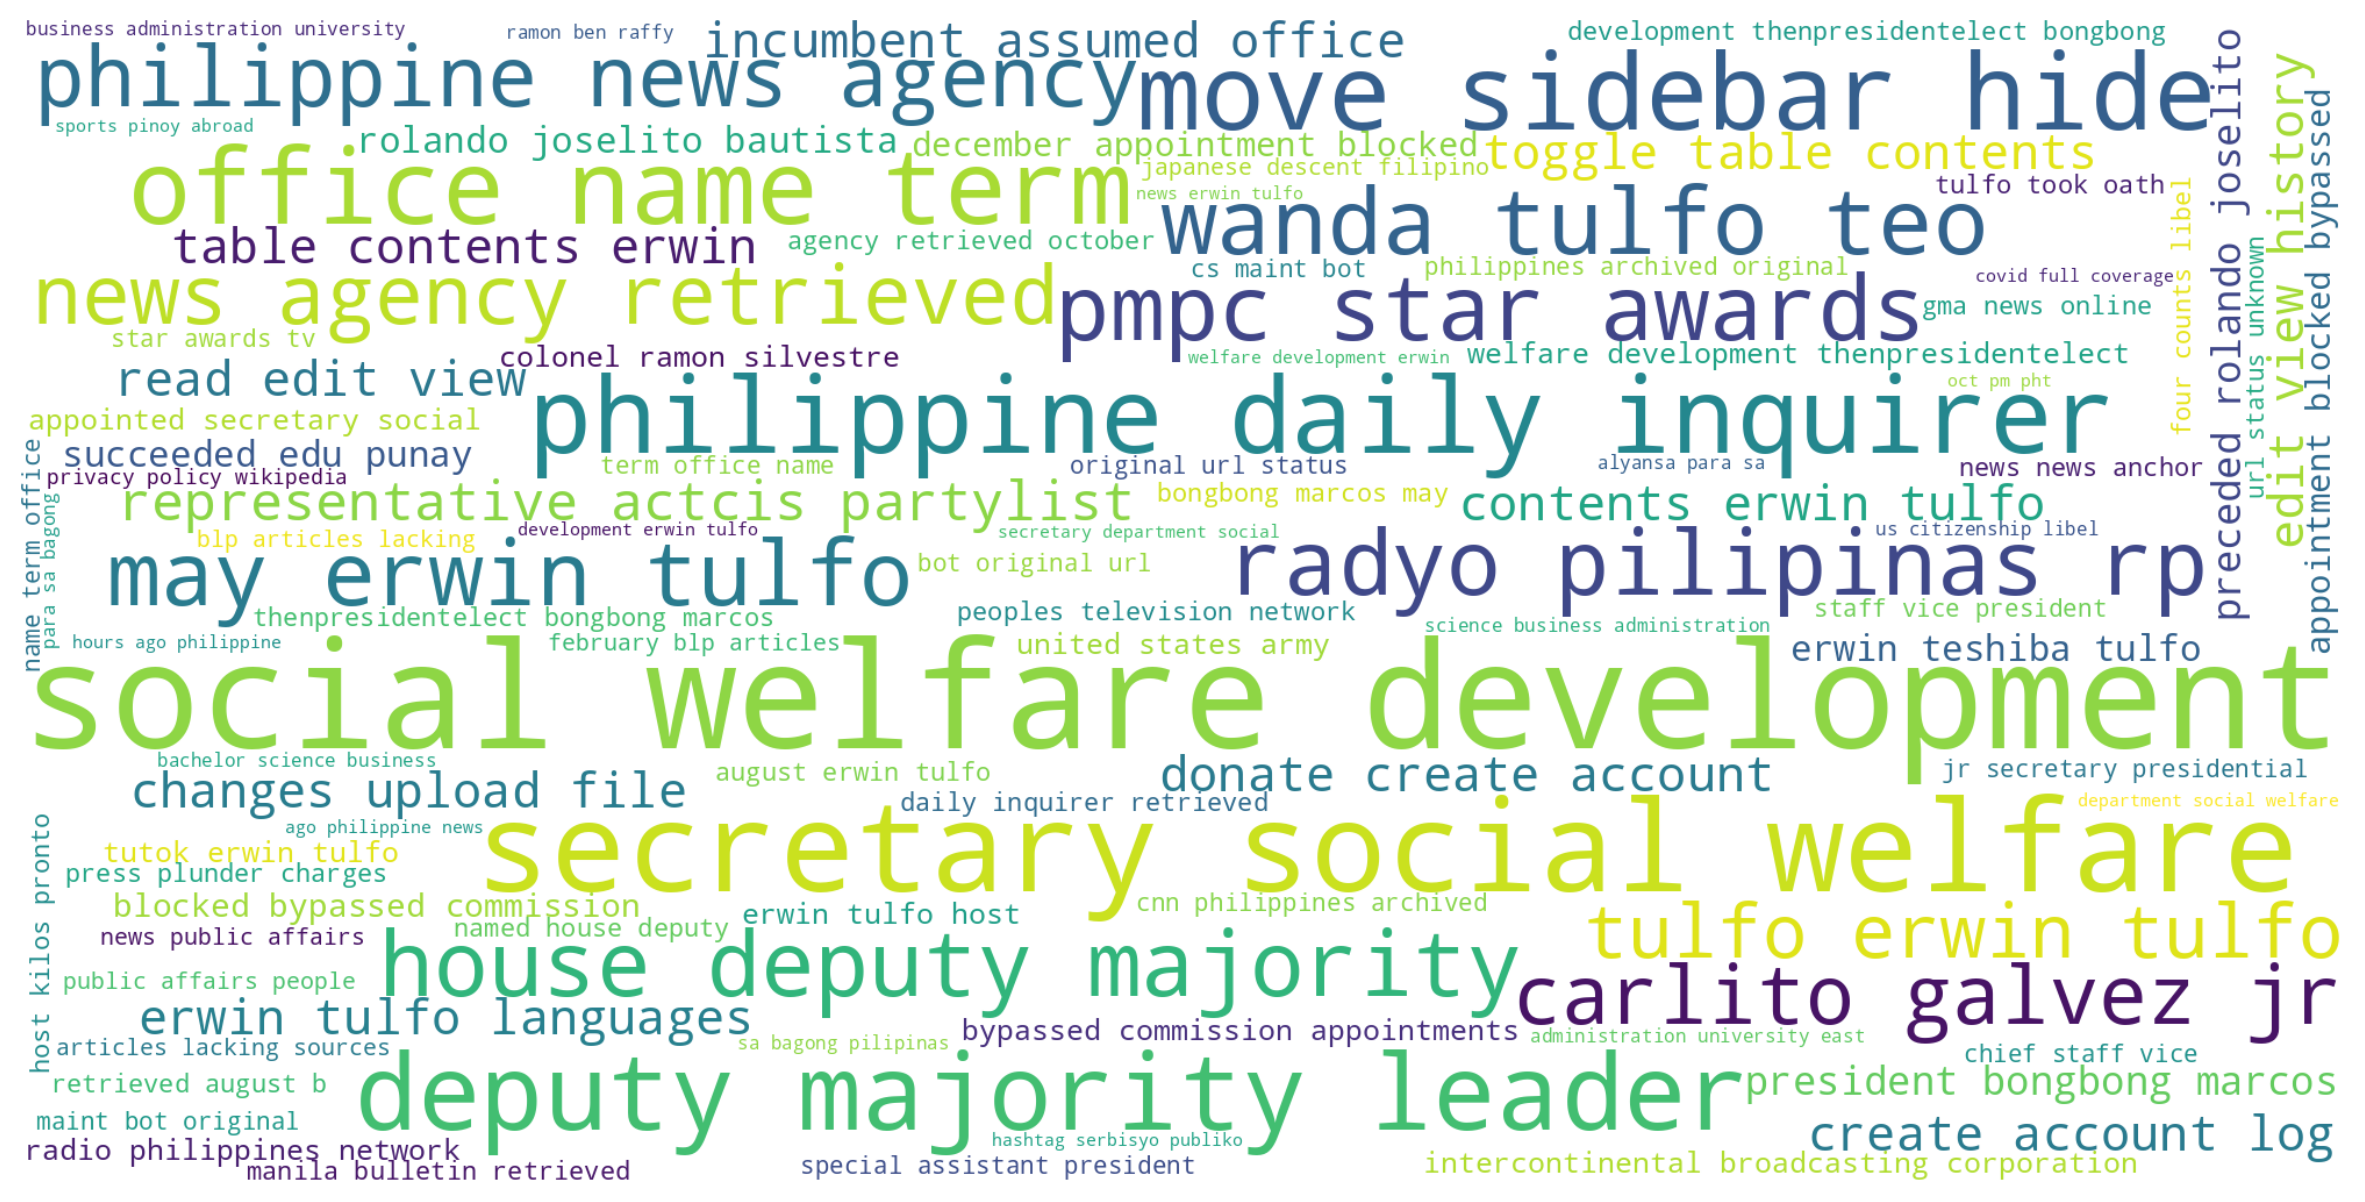

In [34]:
name = names[0]
tokens, bigrams, trigrams = get_tokens(name, num_results=10)

# Group the variables in a tuple or list
ngrams_data = (tokens, bigrams, trigrams)

# Iterate over the grouped variables
for item in ngrams_data:
  print("Name: ",name)
  display_word_cloud(item)



---

### **Phase 2 Abstract**  

Building upon our initial analysis of word clouds from Google search results, we extend our exploration by leveraging **DuckDB** as our storage and querying platform. This phase focuses on **structured bigram analysis**, where we store extracted text data, generate **word frequency distributions**, and perform **set-based comparisons** to identify relationships between commonly occurring multi-word phrases. Using **set operations**, we analyze the **overlap and uniqueness** of bigrams among different candidates, enabling a comparative linguistic study. We further illustrate these relationships through **Venn diagrams**, visually depicting shared and distinct bigrams between candidates. This phase enhances the interpretability of our findings by combining **efficient querying, frequency analysis, and visual storytelling**, offering a **scalable, structured approach to textual data analysis**.


In [35]:
!pip install duckdb

In [39]:
import duckdb
import pandas as pd

# Connect to DuckDB (or create if it doesn't exist)
conn = duckdb.connect("senatorial_tokens.duckdb")

# Create sequence for auto-incrementing IDs (if not exists)
conn.execute("CREATE SEQUENCE IF NOT EXISTS seq_tokens_id START 1;")

# Create table if it doesn't exist (now using sequence for ID)
conn.execute("""
    CREATE TABLE IF NOT EXISTS tokens (
        id INTEGER PRIMARY KEY DEFAULT nextval('seq_tokens_id'),
        name TEXT,
        party TEXT,
        token TEXT,
        type TEXT  -- unigram, bigram, trigram
    )
""")

# Let's limit to top 3 first
names = names[:3]
parties = parties[:3]

# Iterate through all names and store tokens in DuckDB
for name, party in zip(names, parties):
    print(f"Processing: {name} ({party})")

    # Generate tokens, bigrams, and trigrams
    tokens, bigrams, trigrams = get_tokens(name, num_results=10)

    # Convert to DataFrame
    df_tokens = pd.DataFrame({"name": name, "party": party, "token": tokens, "type": "unigram"})
    df_bigrams = pd.DataFrame({"name": name, "party": party, "token": bigrams, "type": "bigram"})
    df_trigrams = pd.DataFrame({"name": name, "party": party, "token": trigrams, "type": "trigram"})

    # Insert into DuckDB using the sequence for ID
    conn.executemany("INSERT INTO tokens (name, party, token, type) VALUES (?, ?, ?, ?)", df_tokens.values.tolist())
    conn.executemany("INSERT INTO tokens (name, party, token, type) VALUES (?, ?, ?, ?)", df_bigrams.values.tolist())
    conn.executemany("INSERT INTO tokens (name, party, token, type) VALUES (?, ?, ?, ?)", df_trigrams.values.tolist())

# Commit and close
conn.commit()
conn.close()

print("Token storage in DuckDB complete.")


Processing: ERWIN TULFO (LAKAS)
Error fetching https://www.congress.gov.ph/house-members/view/?member=K140&name=Tulfo%2C+Erwin+T.: HTTP Error 403: Forbidden
Error fetching https://www.instagram.com/erwintulforeal/: HTTP Error 429: Too Many Requests
Error fetching https://www.manilatimes.net/2025/02/12/photos/election-profile-erwin-tulfo/2054361: HTTP Error 403: Forbidden
Processing: BONG GO GO (PDPLBN)
Error fetching https://www.instagram.com/senatorbonggo/?hl=en: HTTP Error 429: Too Many Requests
Error fetching https://rollingstonephilippines.com/state-of-affairs/2025-philippine-elections-senatorial-primer-bong-go/: HTTP Error 403: Forbidden
Error fetching https://www.instagram.com/senatorbonggo/?locale=uken1&hl=en: HTTP Error 429: Too Many Requests
Processing: TITO SOTTO (NPC)
Error fetching https://web.senate.gov.ph/senators/sen_bio/sotto_bio.asp: HTTP Error 403: Forbidden
Error fetching https://comappt.gov.ph/about-the-senate-president-ca-chairperson/: HTTP Error 403: Forbidden
Err

In [40]:
!pip install  matplotlib_venn


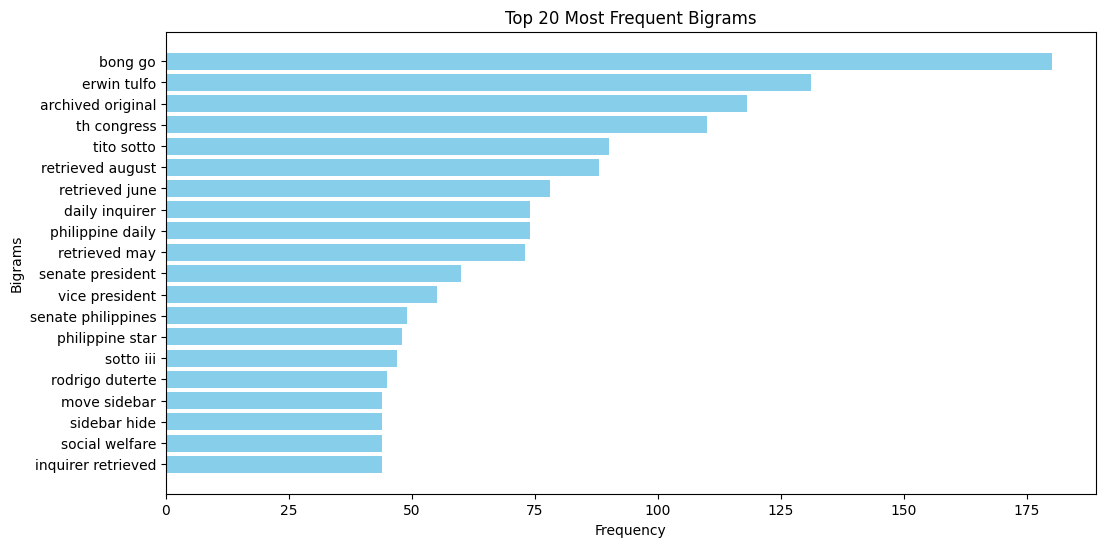

In [46]:
# Connect to DuckDB
conn = duckdb.connect("senatorial_tokens.duckdb")

# Query to retrieve all bigrams and their counts
query = """
    SELECT token, COUNT(*) AS frequency
    FROM tokens
    WHERE type = 'bigram'
    GROUP BY token
    ORDER BY frequency DESC
    LIMIT 20
"""
df = conn.execute(query).fetchdf()
conn.close()  # Close the connection

# Plot the distribution
plt.figure(figsize=(12, 6))
plt.barh(df["token"], df["frequency"], color='skyblue')
plt.xlabel("Frequency")
plt.ylabel("Bigrams")
plt.title("Top 20 Most Frequent Bigrams")
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()


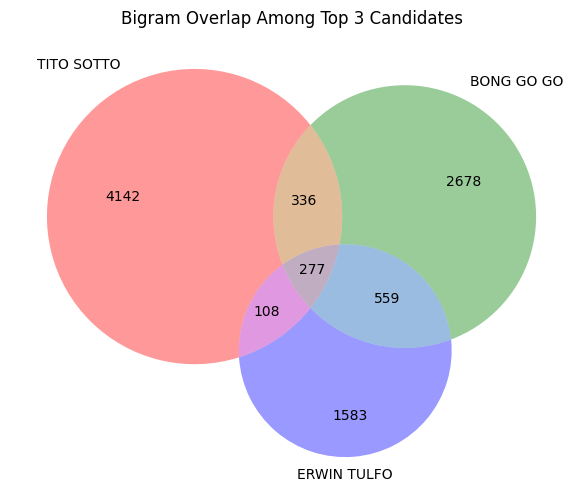

In [47]:
import duckdb
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

# Connect to DuckDB
conn = duckdb.connect("senatorial_tokens.duckdb")

# Step 1: Retrieve the top 3 candidates based on bigram frequency
top_candidates_query = """
    SELECT name
    FROM (
        SELECT name, COUNT(*) as bigram_count
        FROM tokens
        WHERE type = 'bigram'
        GROUP BY name
        ORDER BY bigram_count DESC
        LIMIT 3
    )
"""
top_candidates = conn.execute(top_candidates_query).fetchdf()["name"].tolist()

# Step 2: Retrieve bigrams for each of the top 3 candidates
bigrams_dict = {}
for name in top_candidates:
    query = f"""
        SELECT token FROM tokens
        WHERE name = '{name}' AND type = 'bigram'
    """
    bigrams = set(conn.execute(query).fetchdf()["token"])
    bigrams_dict[name] = bigrams

conn.close()  # Close the database connection

# Extract bigram sets for the three candidates
bigram_set1, bigram_set2, bigram_set3 = bigrams_dict.values()
candidate1, candidate2, candidate3 = bigrams_dict.keys()

# Step 3: Create a Venn diagram to show overlaps and non-overlaps
plt.figure(figsize=(8, 6))
venn = venn3(
    [bigram_set1, bigram_set2, bigram_set3],
    set_labels=[candidate1, candidate2, candidate3]
)

# Customize colors for better visibility
for subset in venn.set_labels:
    subset.set_fontsize(10)

plt.title("Bigram Overlap Among Top 3 Candidates")
plt.show()


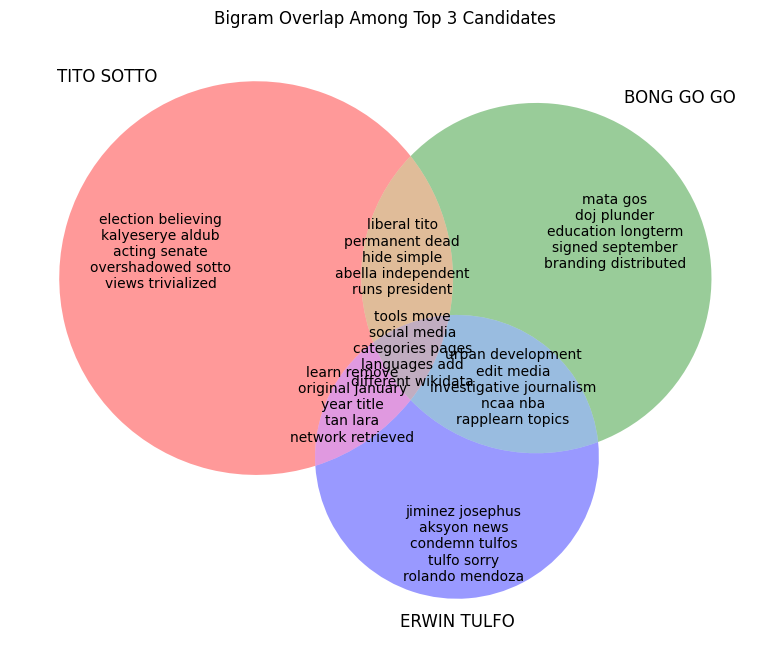

In [51]:
import duckdb
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

# Connect to DuckDB
conn = duckdb.connect("senatorial_tokens.duckdb")

# Step 1: Retrieve the top 3 candidates based on bigram frequency
top_candidates_query = """
    SELECT name
    FROM (
        SELECT name, COUNT(*) as bigram_count
        FROM tokens
        WHERE type = 'bigram'
        GROUP BY name
        ORDER BY bigram_count DESC
        LIMIT 3
    )
"""
top_candidates = conn.execute(top_candidates_query).fetchdf()["name"].tolist()

# Step 2: Retrieve bigrams for each of the top 3 candidates
bigrams_dict = {}
for name in top_candidates:
    query = f"""
        SELECT token FROM tokens
        WHERE name = '{name}' AND type = 'bigram'
    """
    bigrams = set(conn.execute(query).fetchdf()["token"])
    bigrams_dict[name] = bigrams

conn.close()  # Close the database connection

# Extract bigram sets for overlap analysis
bigram_set1 = bigrams_dict[top_candidates[0]]
bigram_set2 = bigrams_dict[top_candidates[1]]
bigram_set3 = bigrams_dict[top_candidates[2]]

# Compute overlaps and unique bigrams
overlap_3 = bigram_set1 & bigram_set2 & bigram_set3
overlap_12 = bigram_set1 & bigram_set2 - overlap_3
overlap_13 = bigram_set1 & bigram_set3 - overlap_3
overlap_23 = bigram_set2 & bigram_set3 - overlap_3
unique_1 = bigram_set1 - (bigram_set2 | bigram_set3)
unique_2 = bigram_set2 - (bigram_set1 | bigram_set3)
unique_3 = bigram_set3 - (bigram_set1 | bigram_set2)

# Step 3: Create a Venn diagram with bigrams listed inside
plt.figure(figsize=(10, 8))
venn = venn3([bigram_set1, bigram_set2, bigram_set3], set_labels=top_candidates)

# Function to format bigram text for Venn diagram
def format_bigrams(bigrams):
    return "\n".join(list(bigrams)[:5])  # Limit to 5 bigrams for readability

# Annotate each section of the Venn diagram
venn.get_label_by_id('100').set_text(format_bigrams(unique_1))  # Unique to candidate 1
venn.get_label_by_id('010').set_text(format_bigrams(unique_2))  # Unique to candidate 2
venn.get_label_by_id('001').set_text(format_bigrams(unique_3))  # Unique to candidate 3
venn.get_label_by_id('110').set_text(format_bigrams(overlap_12))  # Overlap between 1 & 2
venn.get_label_by_id('101').set_text(format_bigrams(overlap_13))  # Overlap between 1 & 3
venn.get_label_by_id('011').set_text(format_bigrams(overlap_23))  # Overlap between 2 & 3
venn.get_label_by_id('111').set_text(format_bigrams(overlap_3))   # Overlap among all three

# Display Venn diagram
plt.title("Bigram Overlap Among Top 3 Candidates")
plt.show()
